### Universidad EAFIT
### Estadistica No Parametrica - Trabajo Final
### Andrés Felipe Mejía Flórez
### Luis Fernando Salgado Durango
### Daniela Lopera Pai

## Librerias

In [1]:
from funciones import *

In [2]:
%load_ext autoreload
%autoreload 2

## Preprocesamiento

### Carga y exploración

In [3]:
df_raw = pd.read_csv("Sleep_Efficiency.csv")
df_raw.drop(columns=["ID"],axis=1,inplace=True)
df_raw.columns = df_raw.columns.str.lower().str.replace(' ', '_')
df_raw.head(5)

,age,gender,bedtime,wakeup_time,sleep_duration,sleep_efficiency,rem_sleep_percentage,deep_sleep_percentage,light_sleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,smoking_status,exercise_frequency
0,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     452 non-null    int64  
 1   gender                  452 non-null    object 
 2   bedtime                 452 non-null    object 
 3   wakeup_time             452 non-null    object 
 4   sleep_duration          452 non-null    float64
 5   sleep_efficiency        452 non-null    float64
 6   rem_sleep_percentage    452 non-null    int64  
 7   deep_sleep_percentage   452 non-null    int64  
 8   light_sleep_percentage  452 non-null    int64  
 9   awakenings              432 non-null    float64
 10  caffeine_consumption    427 non-null    float64
 11  alcohol_consumption     438 non-null    float64
 12  smoking_status          452 non-null    object 
 13  exercise_frequency      446 non-null    float64
dtypes: float64(6), int64(4), object(4)
memory 

In [5]:
df_raw['bedtime'] = pd.to_datetime(df_raw['bedtime'])
df_raw['hour_bedtime'] = df_raw['bedtime'].dt.hour

df_raw['wakeup_time'] = pd.to_datetime(df_raw['wakeup_time'])
df_raw['hour_wakeup'] = df_raw['wakeup_time'].dt.hour

df_raw.drop(columns=["bedtime","wakeup_time"],axis=1,inplace=True)

### Conversión de variables categoricas 

In [6]:
df = pd.get_dummies(df_raw,dtype=int)
df.columns = df.columns.str.lower()
df.head(5)

,age,sleep_duration,sleep_efficiency,rem_sleep_percentage,deep_sleep_percentage,light_sleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,exercise_frequency,hour_bedtime,hour_wakeup,gender_female,gender_male,smoking_status_no,smoking_status_yes
0,65,6.0,0.88,18,70,12,0.0,0.0,0.0,3.0,1,7,1,0,0,1
1,69,7.0,0.66,19,28,53,3.0,0.0,3.0,3.0,2,9,0,1,0,1
2,40,8.0,0.89,20,70,10,1.0,0.0,0.0,3.0,21,5,1,0,1,0
3,40,6.0,0.51,23,25,52,3.0,50.0,5.0,1.0,2,8,1,0,0,1
4,57,8.0,0.76,27,55,18,3.0,0.0,3.0,3.0,1,9,0,1,1,0


### Estadisticas

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,452.0,40.285398,13.172250,9.0,29.0000,40.00,52.0,69.00
sleep_duration,452.0,7.465708,0.866625,5.0,7.0000,7.50,8.0,10.00
sleep_efficiency,452.0,0.788916,0.135237,0.5,0.6975,0.82,0.9,0.99
rem_sleep_percentage,452.0,22.615044,3.525963,15.0,20.0000,22.00,25.0,30.00
deep_sleep_percentage,452.0,52.823009,15.654235,18.0,48.2500,58.00,63.0,75.00
light_sleep_percentage,452.0,24.561947,15.313665,7.0,15.0000,18.00,32.5,63.00
awakenings,432.0,1.641204,1.356762,0.0,1.0000,1.00,3.0,4.00
caffeine_consumption,427.0,23.653396,30.202785,0.0,0.0000,25.00,50.0,200.00
alcohol_consumption,438.0,1.173516,1.621377,0.0,0.0000,0.00,2.0,5.00
exercise_frequency,446.0,1.791480,1.428134,0.0,0.0000,2.00,3.0,5.00


### Valores faltantes

In [8]:
df.isna().sum()

age                        0
sleep_duration             0
sleep_efficiency           0
rem_sleep_percentage       0
deep_sleep_percentage      0
light_sleep_percentage     0
awakenings                20
caffeine_consumption      25
alcohol_consumption       14
exercise_frequency         6
hour_bedtime               0
hour_wakeup                0
gender_female              0
gender_male                0
smoking_status_no          0
smoking_status_yes         0
dtype: int64

In [9]:
df["awakenings"] = df["awakenings"].fillna(0)
df["caffeine_consumption"] = df["caffeine_consumption"].fillna(0)
df["alcohol_consumption"] = df["alcohol_consumption"].fillna(0)
df["exercise_frequency"] = df["exercise_frequency"].fillna(0)

### Histogramas

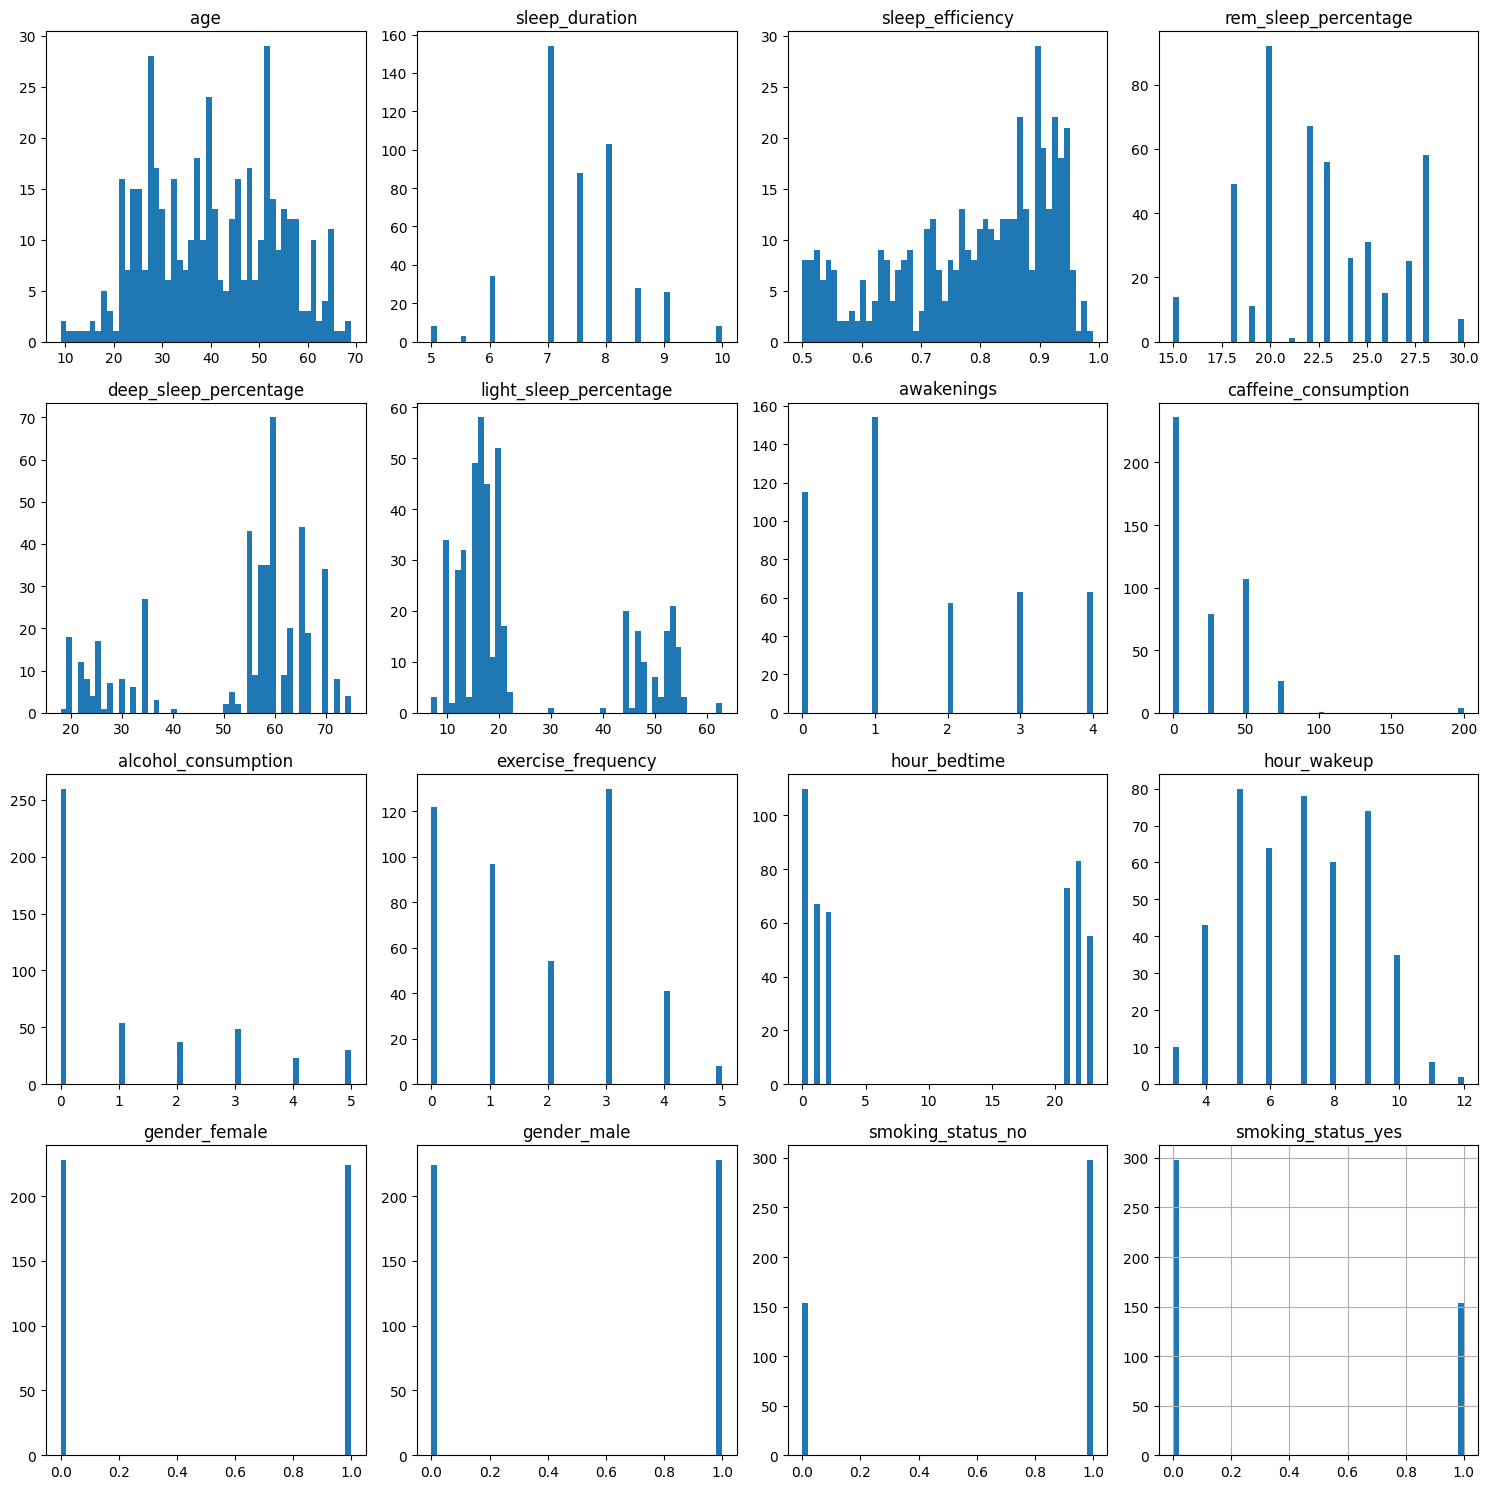

In [10]:
plot_histograms_separados(df)

In [11]:
X = df.drop(columns=["sleep_efficiency"],axis=1).copy()
Y = df[["sleep_efficiency"]].copy()

### Correlaciones parametricas y no parametricas

In [12]:
corr_pearson = X.corr(method = 'pearson')
corr_pearson.to_csv("correlaciones/pearson.csv")

corr_kendall = X.corr(method = 'kendall')
corr_kendall.to_csv("correlaciones/kendall.csv")

corr_spearman = X.corr(method = 'spearman')
corr_spearman.to_csv("correlaciones/spearman.csv")

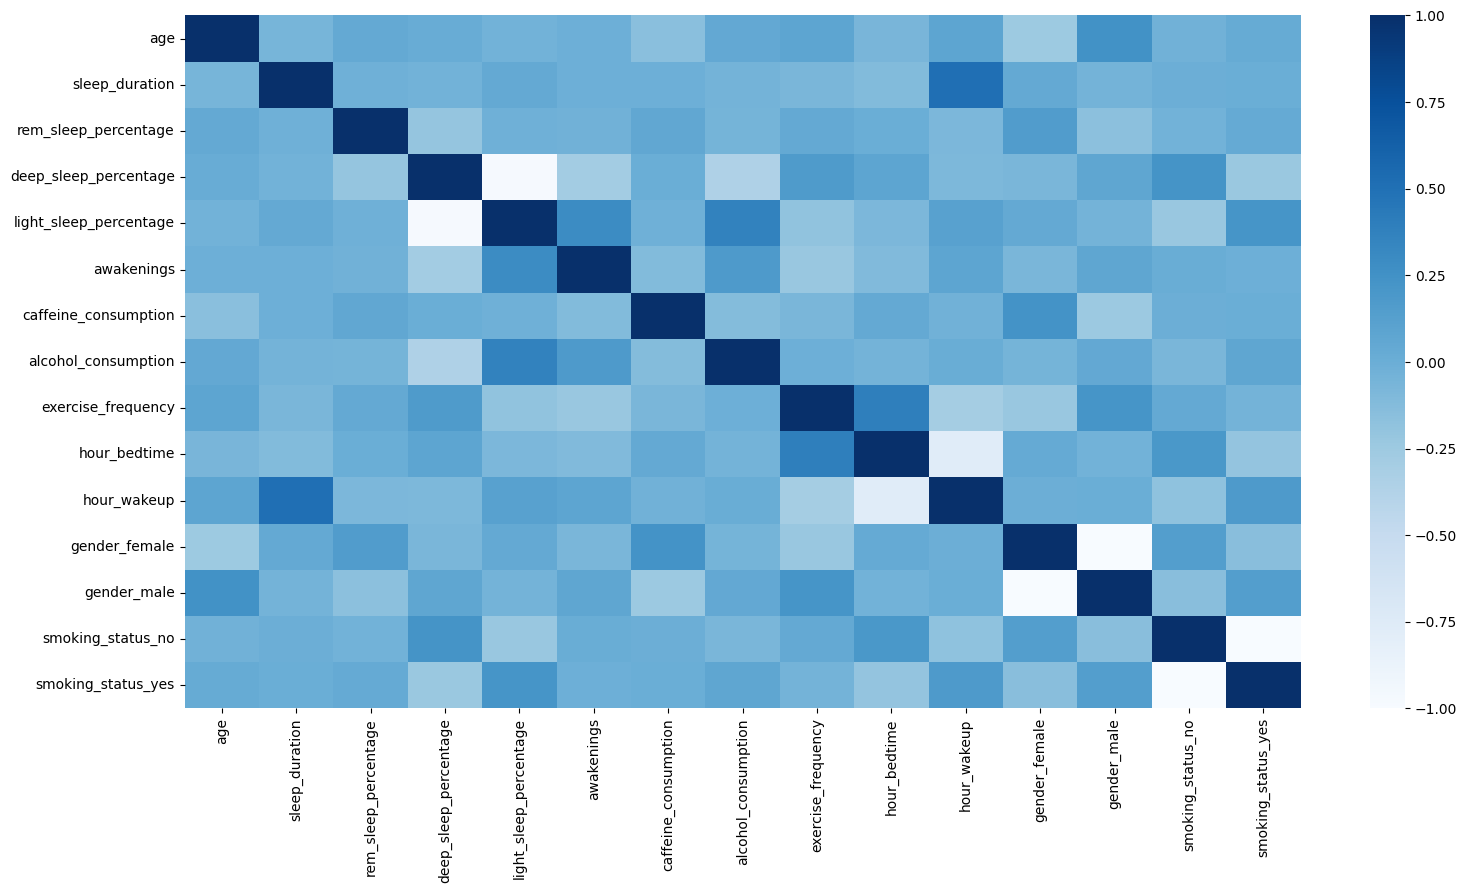

In [13]:
plt.figure(figsize=(18, 9))
sns.heatmap(corr_pearson, annot=False, cmap="Blues")
plt.show()

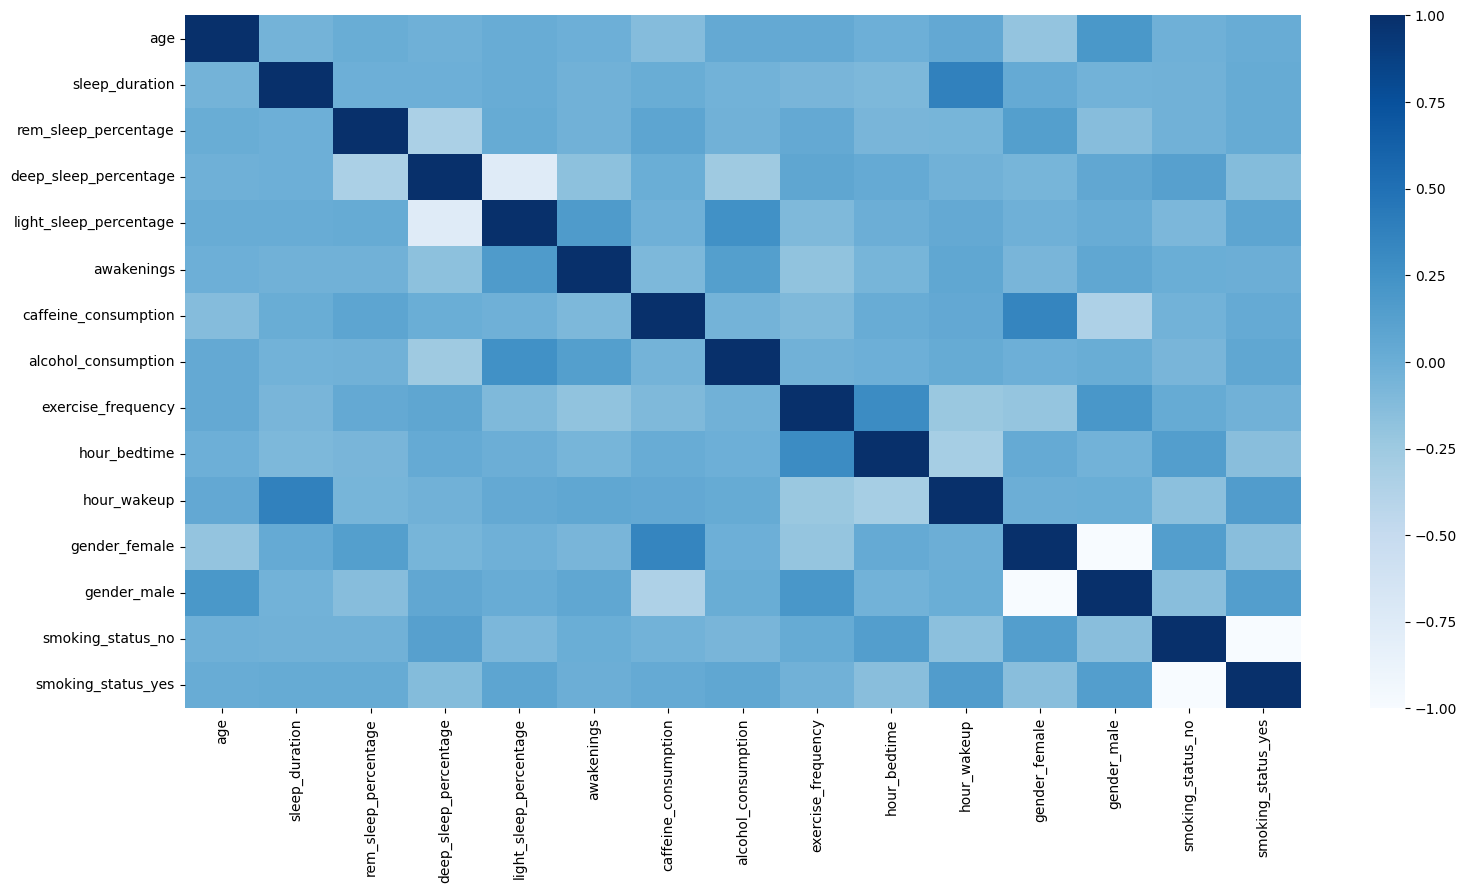

In [14]:
plt.figure(figsize=(18, 9))
sns.heatmap(corr_kendall, annot=False, cmap="Blues")
plt.show()

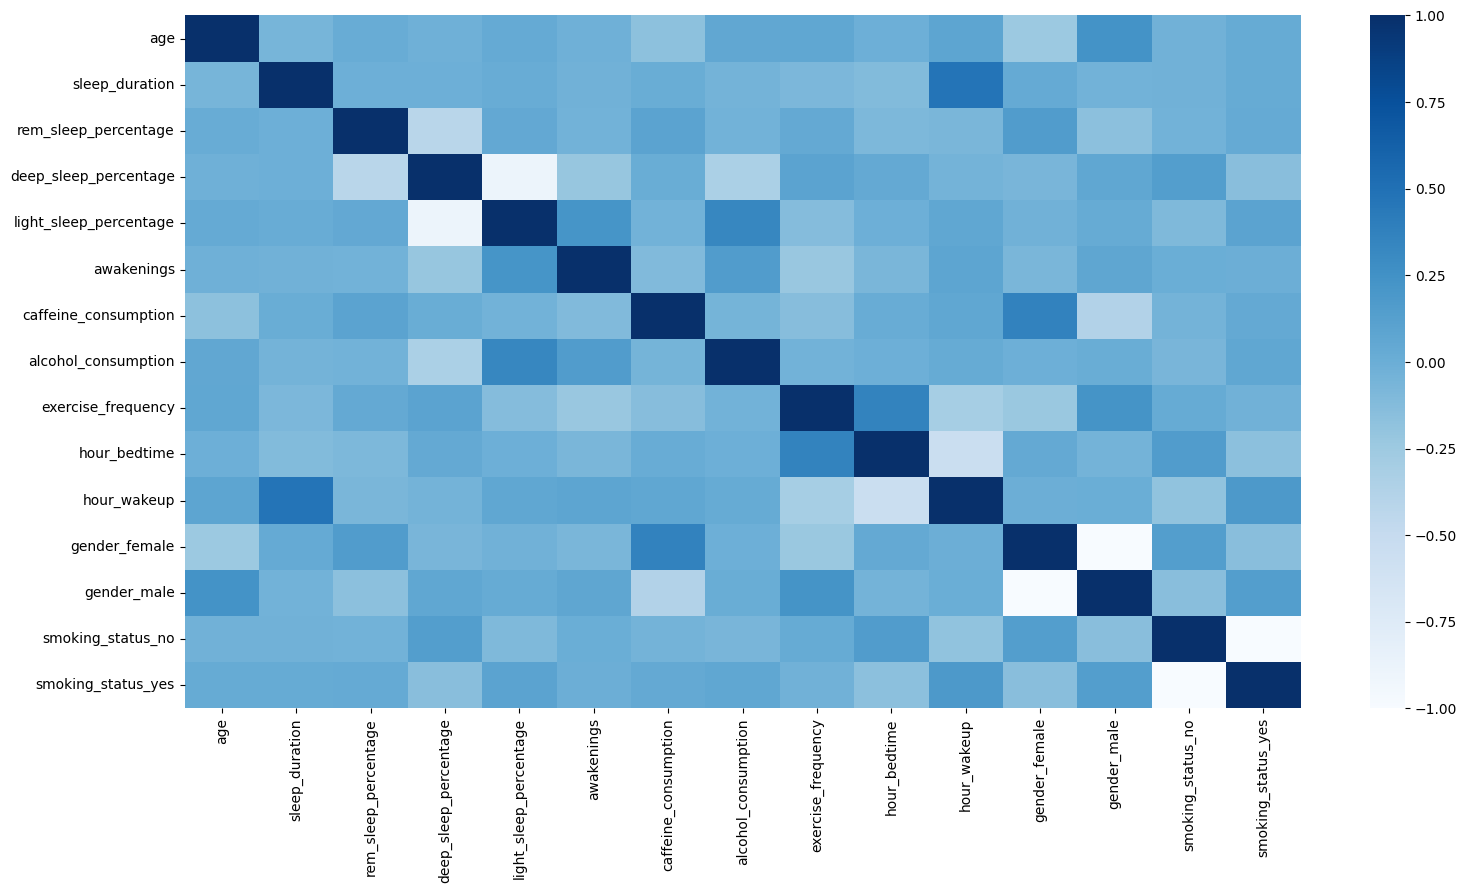

In [15]:
plt.figure(figsize=(18, 9))
sns.heatmap(corr_spearman, annot=False, cmap="Blues")
plt.show()

### Selección de variables

In [16]:
aux_df = df.drop(columns=["gender_male"],axis=1).copy()

In [17]:
aux_df = aux_df.drop(columns=["smoking_status_no"],axis=1).copy()

In [18]:
aux_df = aux_df.drop(columns=["light_sleep_percentage"],axis=1).copy()

In [19]:
corr_multiples(aux_df)

,Columna,Correlacion_Multiple
2,sleep_efficiency,0.801730
10,hour_wakeup,0.788705
9,hour_bedtime,0.735274
4,deep_sleep_percentage,0.726517
1,sleep_duration,0.471585
5,awakenings,0.415821
8,exercise_frequency,0.286201
3,rem_sleep_percentage,0.252718
11,gender_female,0.211940
12,smoking_status_yes,0.205014


### Detección de outliers

#### Boxplots

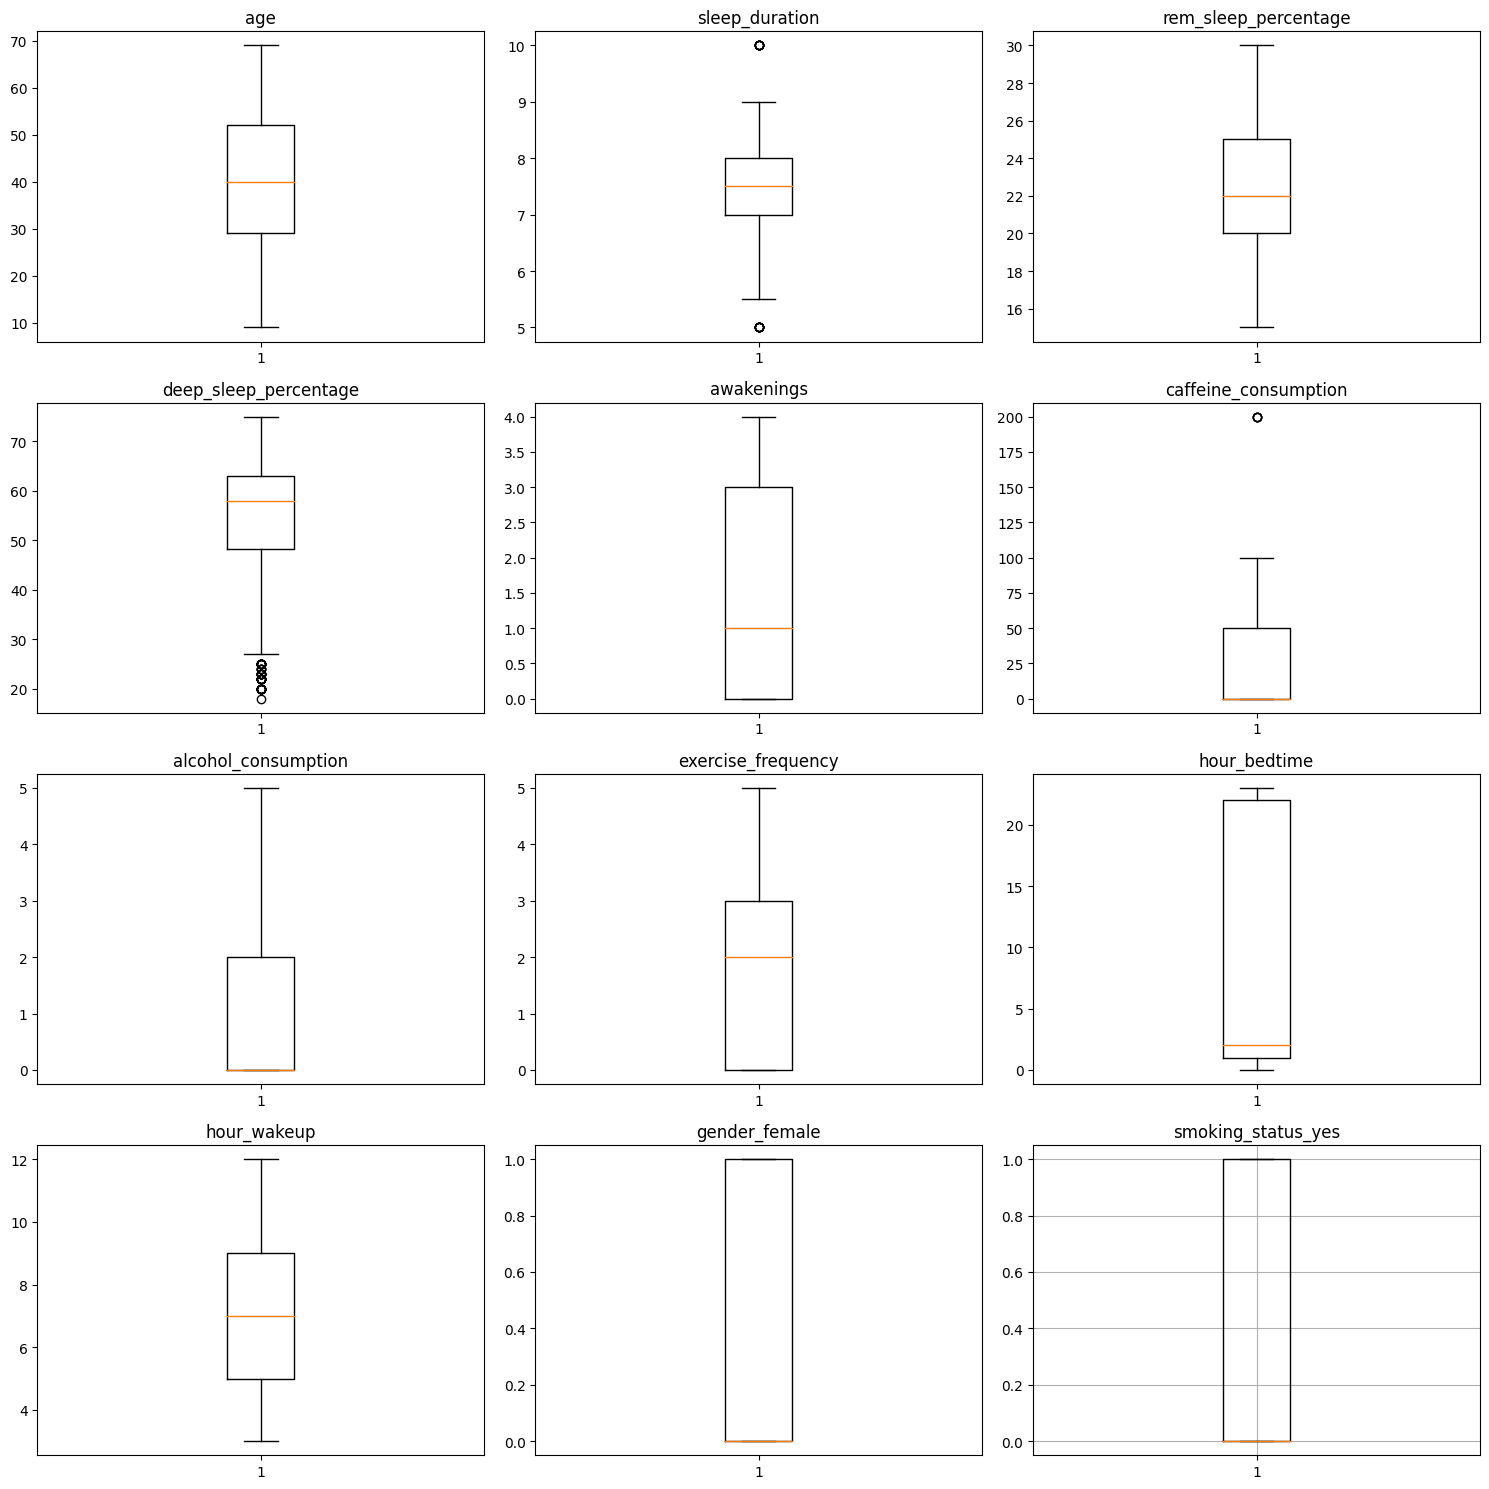

In [20]:
df_final = aux_df.copy()
X = df_final.drop(columns=["sleep_efficiency"],axis=1).copy()
plot_boxplots_separados(X)

#### Metodos de distancias

In [21]:
Out_euclidea = outliers_euclidea(X.values, 0.1)
print(f"Outliers detectados por medio de la distancia Euclidea: {Out_euclidea.sum()}")
Out_mahal = outliers_mahal(X.values, 0.1)
print(f"Outliers detectados por medio de la distancia de Mahalanobis: {Out_mahal.sum()}")

Outliers detectados por medio de la distancia Euclidea: 46
Outliers detectados por medio de la distancia de Mahalanobis: 46


### Datos sinteticos

In [22]:
df_synthetic = generate_multivariate_data(X=df_final, bins=1000, N=550)

In [23]:
cols_discretas = ["age","sleep_duration","rem_sleep_percentage",
                  "deep_sleep_percentage","awakenings","exercise_frequency",
                  "hour_bedtime","hour_wakeup","gender_female","smoking_status_yes"]

df_synthetic[cols_discretas] = df_synthetic[cols_discretas].applymap(redondeo_personalizado)

In [24]:
Out_euclidea2 = outliers_euclidea(df_synthetic.values, 0.1)
print(f"Outliers detectados por medio de la distancia Euclidea: {Out_euclidea2.sum()}")
Out_mahal2 = outliers_mahal(df_synthetic.values, 0.1)
print(f"Outliers detectados por medio de la distancia de Mahalanobis: {Out_mahal2.sum()}")

Outliers detectados por medio de la distancia Euclidea: 55
Outliers detectados por medio de la distancia de Mahalanobis: 55


### Dataset final

In [25]:
dataset = pd.concat([df_final, df_synthetic], ignore_index=True)
dataset.shape

(1002, 13)

In [26]:
X2 = dataset.drop(columns=["sleep_efficiency"],axis=1).copy()
Out_euclidea3 = outliers_euclidea(X2.values, 0.1)
print(f"Outliers detectados por medio de la distancia Euclidea: {Out_euclidea3.sum()}")
Out_mahal3 = outliers_mahal(X2.values, 0.1)
print(f"Outliers detectados por medio de la distancia de Mahalanobis: {Out_mahal3.sum()}")

Outliers detectados por medio de la distancia Euclidea: 101
Outliers detectados por medio de la distancia de Mahalanobis: 101


## Modelación

### Particionamiento

In [27]:
X_aux = dataset.drop(columns=["sleep_efficiency"],axis=1).copy().values
Y_aux = dataset[["sleep_efficiency"]].copy()
X_train, X_test, y_train, y_test = train_test_split(X_aux, Y_aux, test_size=0.3, random_state=42)

### Regresión lineal

In [28]:
modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train, y_train)
y_pred_rl = modelo_lineal.predict(X_test)

### Regresión Ransac

In [29]:
model_ransac = RANSACRegressor()
model_ransac.fit(X_train, y_train)
y_pred_ransac = model_ransac.predict(X_test)

### Regresión Huber

In [30]:
nombres_columnas = [col for col in dataset.columns if col != "sleep_efficiency"]
columnas_unidas = '+'.join(nombres_columnas)
modelo_cuantiles = smf.quantreg(f"sleep_efficiency ~ {columnas_unidas}", dataset)
resultado = modelo_cuantiles.fit(q=0.5)
huber = HuberRegressor(epsilon=1.35,max_iter=1000)
huber.fit(X_train, y_train.values.ravel())
y_pred_huber = huber.predict(X_test)

### Regresión Mínimos cuadrados medianos

In [31]:
betas_l1_regression = l1_regression(X_train, y_train.values.reshape(-1,1))
y_pred_rmm = X_test.dot(betas_l1_regression)

### Regresión M-Estimador

In [32]:
c = 1
k = 2
coefficients = fit_m_estimator(X_train, y_train.values.reshape(-1,1), c, k)
y_pred_rme = X_test.dot(coefficients)/100

## Resultados

In [33]:
y_test = y_test.values.reshape(-1,1)
y_pred_ransac = y_pred_ransac.reshape(-1,1)
y_pred_huber = y_pred_huber.reshape(-1,1)
y_pred_rmm = y_pred_rmm.reshape(-1,1)
y_pred_rme = y_pred_rme.reshape(-1,1)

### MSE

In [34]:
mse_rl = mean_squared_error(y_test, y_pred_rl)
print("MSE Regresión lineal: ", mse_rl)

mse_ransac = mean_squared_error(y_test, y_pred_ransac)
print("MSE Regresión RANSAC: ", mse_ransac)

mse_huber = mean_squared_error(y_test, y_pred_huber)
print("MSE Regresión Huber: ", mse_huber)

mse_rmm = mean_squared_error(y_test, y_pred_rmm)
print("MSE Regresión L1: ", mse_rmm)

mse_rme = mean_squared_error(y_test, y_pred_rme)
print("MSE Regresión M-Estimador: ", mse_rme)

MSE Regresión lineal:  0.0035379201064997478
MSE Regresión RANSAC:  0.005534370406196437
MSE Regresión Huber:  0.00353004920871697
MSE Regresión L1:  0.018748546623173514
MSE Regresión M-Estimador:  0.6359649675614504


### MAD

In [35]:
mad_rl = mean_absolute_deviation(y_test, y_pred_rl)
print("MAD Regresión lineal: ", mad_rl)

mad_ransac = mean_absolute_deviation(y_test, y_pred_ransac)
print("MAD Regresión RANSAC: ", mad_ransac)

mad_huber = mean_absolute_deviation(y_test, y_pred_huber)
print("MAD Regresión Huber: ", mad_huber)

mad_rmm = mean_absolute_deviation(y_test, y_pred_rmm)
print("MAD Regresión L1: ", mad_rmm)

mad_rme = mean_absolute_deviation(y_test, y_pred_rme)
print("MAD Regresión M-Estimador: ", mad_rme)

MAD Regresión lineal:  0.04809374817201703
MAD Regresión RANSAC:  0.057168435248206945
MAD Regresión Huber:  0.04757086428181139
MAD Regresión L1:  0.11591335781059811
MAD Regresión M-Estimador:  0.7868479564582088


### Comparación entre metodos

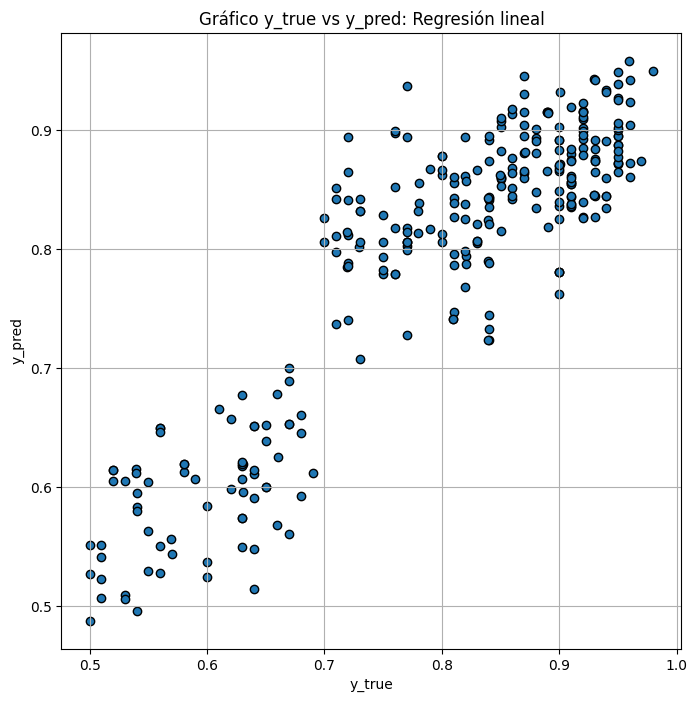

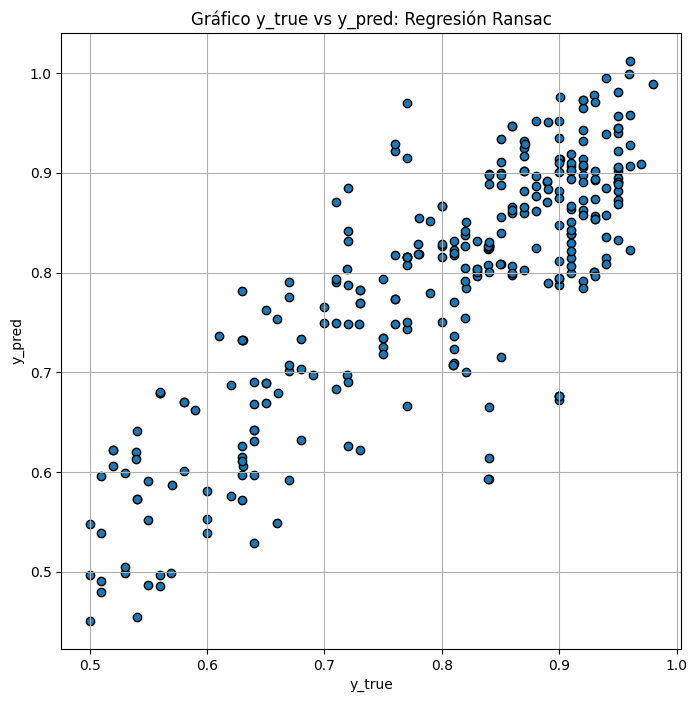

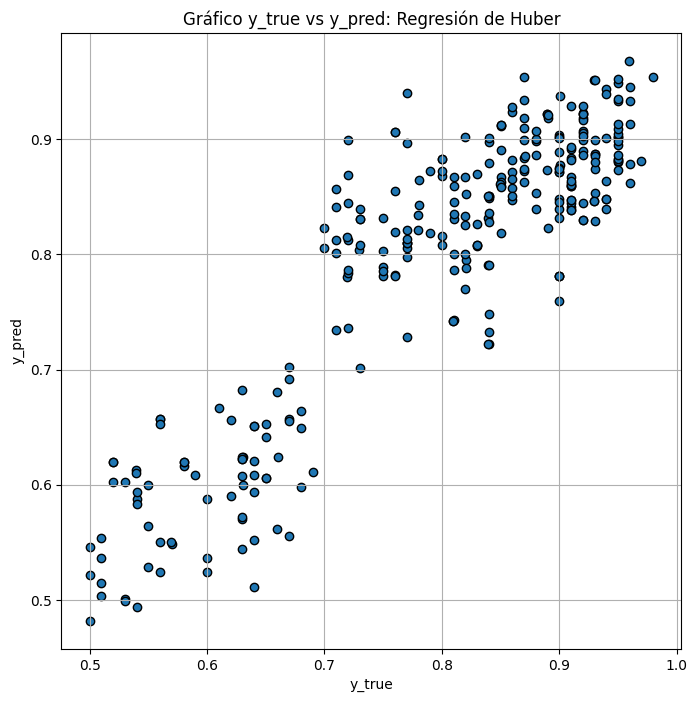

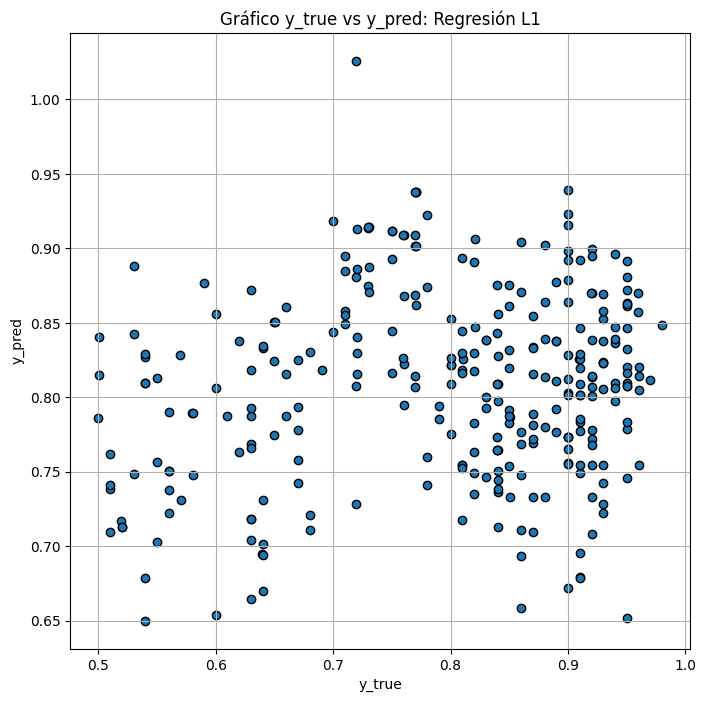

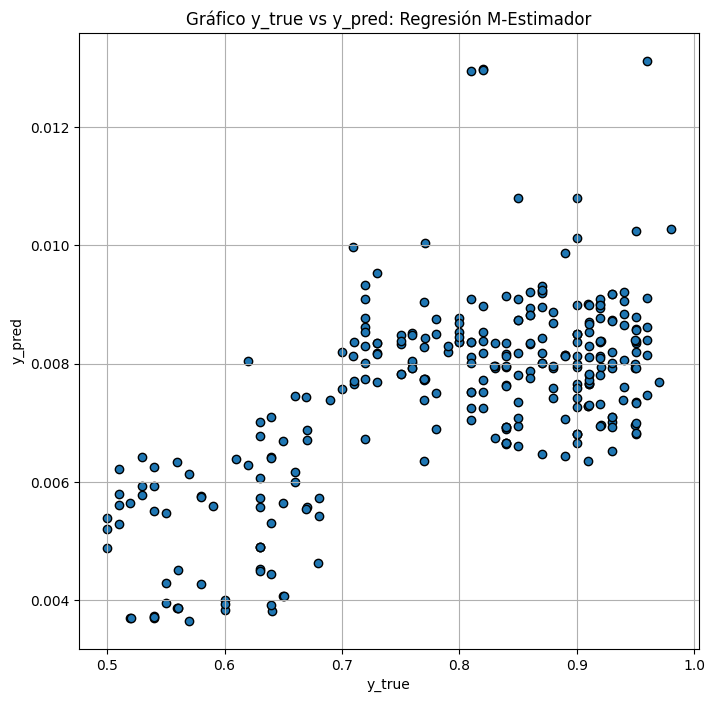

In [36]:
plot_y_true_vs_y_pred(y_test, y_pred_rl, title="Gráfico y_true vs y_pred: Regresión lineal", xlabel="y_true", ylabel="y_pred")
plot_y_true_vs_y_pred(y_test, y_pred_ransac, title="Gráfico y_true vs y_pred: Regresión Ransac", xlabel="y_true", ylabel="y_pred")
plot_y_true_vs_y_pred(y_test, y_pred_huber, title="Gráfico y_true vs y_pred: Regresión de Huber", xlabel="y_true", ylabel="y_pred")
plot_y_true_vs_y_pred(y_test, y_pred_rmm, title="Gráfico y_true vs y_pred: Regresión L1", xlabel="y_true", ylabel="y_pred")
plot_y_true_vs_y_pred(y_test, y_pred_rme, title="Gráfico y_true vs y_pred: Regresión M-Estimador", xlabel="y_true", ylabel="y_pred")

### Distribuciones de errores

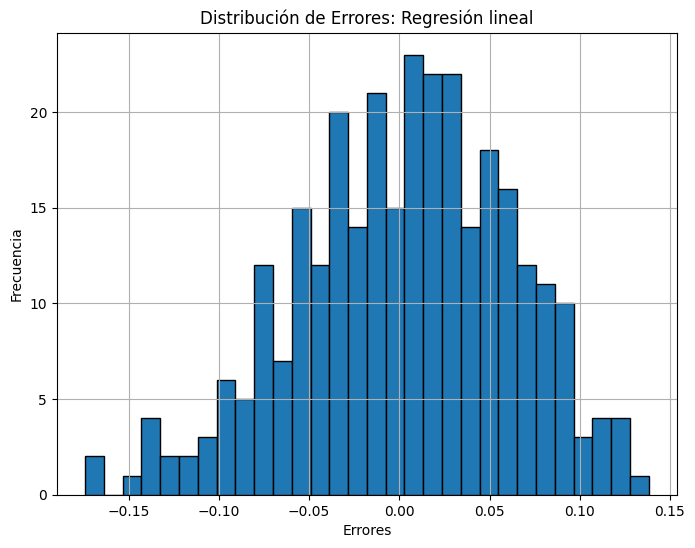

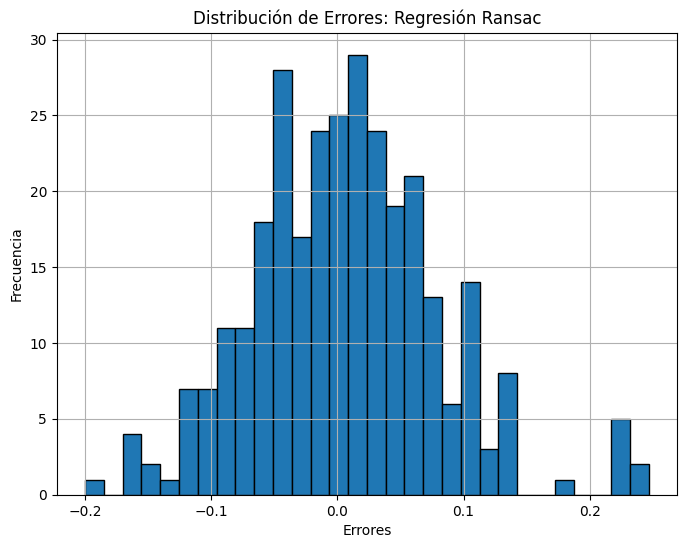

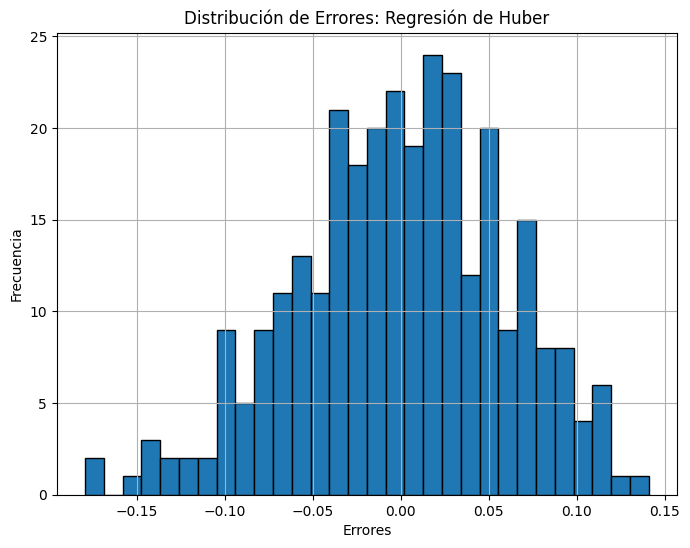

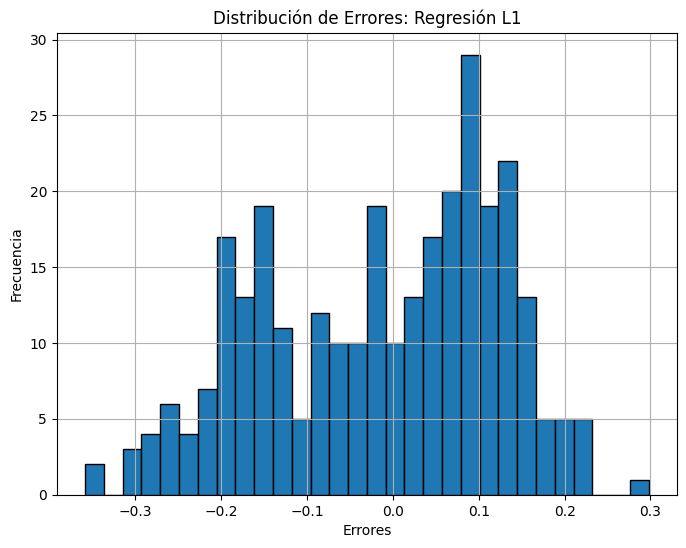

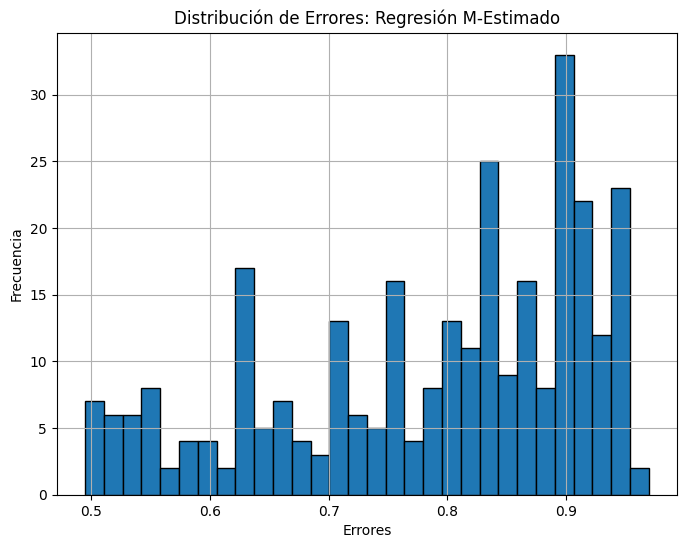

In [37]:
plot_error_distribution(y_test, y_pred_rl, title="Distribución de Errores: Regresión lineal", xlabel="Errores", ylabel="Frecuencia")
plot_error_distribution(y_test, y_pred_ransac, title="Distribución de Errores: Regresión Ransac", xlabel="Errores", ylabel="Frecuencia")
plot_error_distribution(y_test, y_pred_huber, title="Distribución de Errores: Regresión de Huber", xlabel="Errores", ylabel="Frecuencia")
plot_error_distribution(y_test, y_pred_rmm, title="Distribución de Errores: Regresión L1", xlabel="Errores", ylabel="Frecuencia")
plot_error_distribution(y_test, y_pred_rme, title="Distribución de Errores: Regresión M-Estimado", xlabel="Errores", ylabel="Frecuencia")

### Intervalos de confianza del Error

In [38]:
int_conf_rl = int_conf_no_par(y_test, y_pred_rl)
print("Intervalo de confianza para la Regresión lineal: ", int_conf_rl)

int_conf_ransac = int_conf_no_par(y_test, y_pred_ransac)
print("Intervalo de confianza para la Regresión RANSAC: ", int_conf_ransac)

int_conf_huber = int_conf_no_par(y_test, y_pred_huber)
print("Intervalo de confianza para la Regresión Huber: ", int_conf_huber)

int_conf_rmm = int_conf_no_par(y_test, y_pred_rmm)
print("Intervalo de confianza para la Regresión L1: ", int_conf_rmm)

int_conf_rme = int_conf_no_par(y_test, y_pred_rme)
print("Intervalo de confianza para la Regresión M-Estimador: ", int_conf_rme)

Intervalo de confianza para la Regresión lineal:  (0.04575751585679475, 0.0502476245142734)
Intervalo de confianza para la Regresión RANSAC:  (0.05365334092604476, 0.06015690006342981)
Intervalo de confianza para la Regresión Huber:  (0.04519700532088538, 0.04965125705087613)
Intervalo de confianza para la Regresión L1:  (0.11103791429757104, 0.1203653616914673)
Intervalo de confianza para la Regresión M-Estimador:  (0.7782244576614947, 0.7960030323276582)


## Dataset con ruido

In [39]:
dataset_out = add_outliers(dataset.copy(), num_outliers=50, magnitude=10)

In [40]:
dataset_out

,age,sleep_duration,sleep_efficiency,rem_sleep_percentage,deep_sleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,exercise_frequency,hour_bedtime,hour_wakeup,gender_female,smoking_status_yes
0,65.000000,6.000000,0.880000,18.000000,70.000000,0.000000,0.000000,0.000000,3.000000,1.000000,7.000000,1.000000,1.000000
1,69.000000,7.000000,0.660000,19.000000,28.000000,3.000000,0.000000,3.000000,3.000000,2.000000,9.000000,0.000000,1.000000
2,40.000000,8.000000,0.890000,20.000000,70.000000,1.000000,0.000000,0.000000,3.000000,21.000000,5.000000,1.000000,0.000000
3,40.000000,6.000000,0.510000,23.000000,25.000000,3.000000,50.000000,5.000000,1.000000,2.000000,8.000000,1.000000,1.000000
4,57.000000,8.000000,0.760000,27.000000,55.000000,3.000000,0.000000,3.000000,3.000000,1.000000,9.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,44.000000,10.000000,0.719611,28.000000,60.000000,3.000000,50.176648,4.002089,1.000000,0.000000,10.000000,1.000000,1.000000
998,26.000000,8.000000,0.559855,23.000000,23.000000,3.000000,0.041976,4.004282,0.000000,0.000000,7.000000,0.000000,1.000000
999,53.000000,8.000000,0.719970,23.000000,57.000000,3.000000,0.118503,0.003932,0.000000,22.000000,6.000000,0.000000,0.000000
1000,42.000000,8.000000,0.680087,18.000000,35.000000,2.000000,0.123597,0.000362,3.000000,22.000000,6.000000,0.000000,0.000000


## Modelación

### Particionamiento

In [41]:
X_aux = dataset_out.drop(columns=["sleep_efficiency"],axis=1).copy().values
Y_aux = dataset_out[["sleep_efficiency"]].copy()
X_train, X_test, y_train, y_test = train_test_split(X_aux, Y_aux, test_size=0.3, random_state=42)

### Regresión lineal

In [42]:
modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train, y_train)
y_pred_rl = modelo_lineal.predict(X_test)

### Regresión Ransac

In [43]:
model_ransac = RANSACRegressor()
model_ransac.fit(X_train, y_train)
y_pred_ransac = model_ransac.predict(X_test)

### Regresión Huber

In [44]:
nombres_columnas = [col for col in dataset_out.columns if col != "sleep_efficiency"]
columnas_unidas = '+'.join(nombres_columnas)
modelo_cuantiles = smf.quantreg(f"sleep_efficiency ~ {columnas_unidas}", dataset_out)
resultado = modelo_cuantiles.fit(q=0.5)
huber = HuberRegressor(epsilon=1.35,max_iter=1000)
huber.fit(X_train, y_train.values.ravel())
y_pred_huber = huber.predict(X_test)

### Regresión Mínimos cuadrados medianos

In [45]:
betas_l1_regression = l1_regression(X_train, y_train.values.reshape(-1,1))
y_pred_rmm = X_test.dot(betas_l1_regression)

### Regresión M-Estimador

In [46]:
c = 1
k = 2
coefficients = fit_m_estimator(X_train, y_train.values.reshape(-1,1), c, k)
y_pred_rme = X_test.dot(coefficients)

## Resultados

In [47]:
y_test = y_test.values.reshape(-1,1)
y_pred_ransac = y_pred_ransac.reshape(-1,1)
y_pred_huber = y_pred_huber.reshape(-1,1)
y_pred_rmm = y_pred_rmm.reshape(-1,1)
y_pred_rme = y_pred_rme.reshape(-1,1)

### MSE

In [48]:
mse_rl = mean_squared_error(y_test, y_pred_rl)
print("MSE Regresión lineal: ", mse_rl)

mse_ransac = mean_squared_error(y_test, y_pred_ransac)
print("MSE Regresión RANSAC: ", mse_ransac)

mse_huber = mean_squared_error(y_test, y_pred_huber)
print("MSE Regresión Huber: ", mse_huber)

mse_rmm = mean_squared_error(y_test, y_pred_rmm)
print("MSE Regresión L1: ", mse_rmm)

mse_rme = mean_squared_error(y_test, y_pred_rme)
print("MSE Regresión M-Estimador: ", mse_rme)

MSE Regresión lineal:  4.091009605781648
MSE Regresión RANSAC:  4.242956753721746
MSE Regresión Huber:  4.15823851089791
MSE Regresión L1:  3.9044844213528096
MSE Regresión M-Estimador:  3.9531151624631704


### MAD

In [49]:
mad_rl = mean_absolute_deviation(y_test, y_pred_rl)
print("MAD Regresión lineal: ", mad_rl)

mad_ransac = mean_absolute_deviation(y_test, y_pred_ransac)
print("MAD Regresión RANSAC: ", mad_ransac)

mad_huber = mean_absolute_deviation(y_test, y_pred_huber)
print("MAD Regresión Huber: ", mad_huber)

mad_rmm = mean_absolute_deviation(y_test, y_pred_rmm)
print("MAD Regresión L1: ", mad_rmm)

mad_rme = mean_absolute_deviation(y_test, y_pred_rme)
print("MAD Regresión M-Estimador: ", mad_rme)

MAD Regresión lineal:  0.7198225157508669
MAD Regresión RANSAC:  0.46822768999640973
MAD Regresión Huber:  0.45852073853806813
MAD Regresión L1:  0.4882804179000182
MAD Regresión M-Estimador:  0.49196079789501207


### Comparación entre metodos

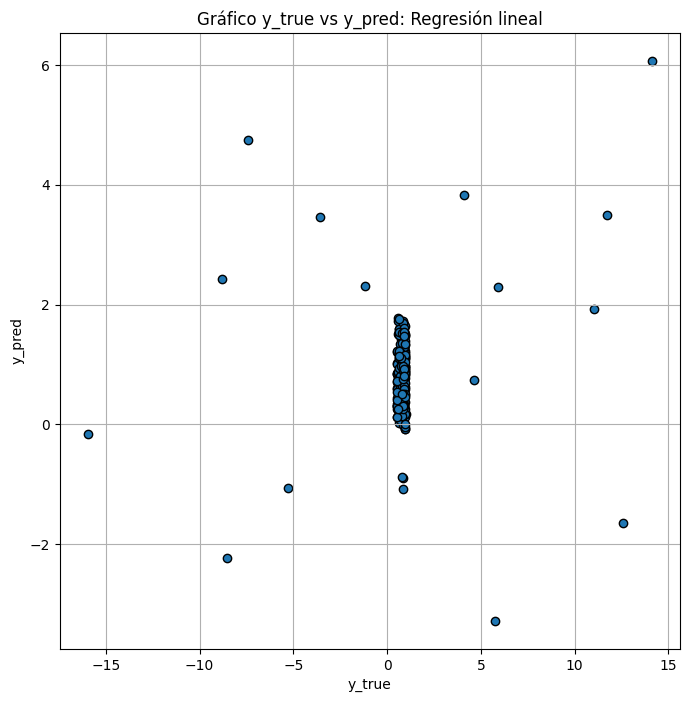

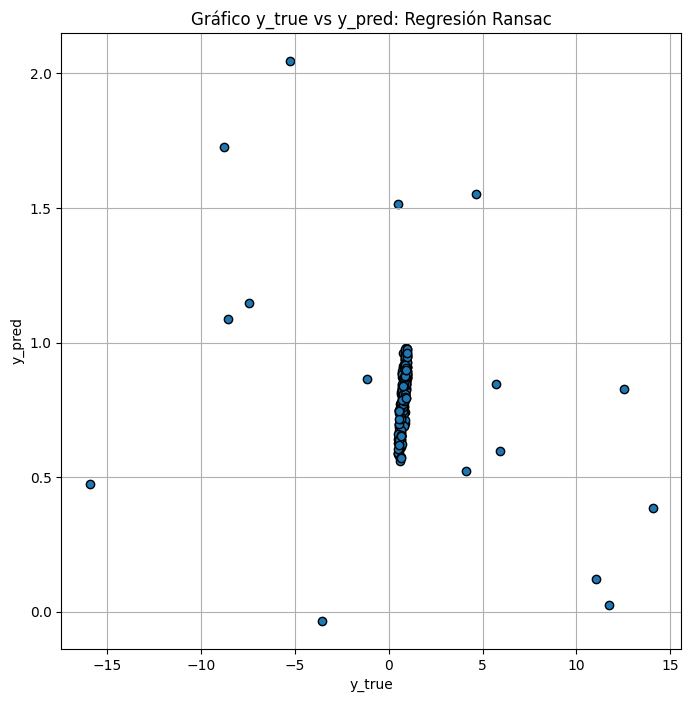

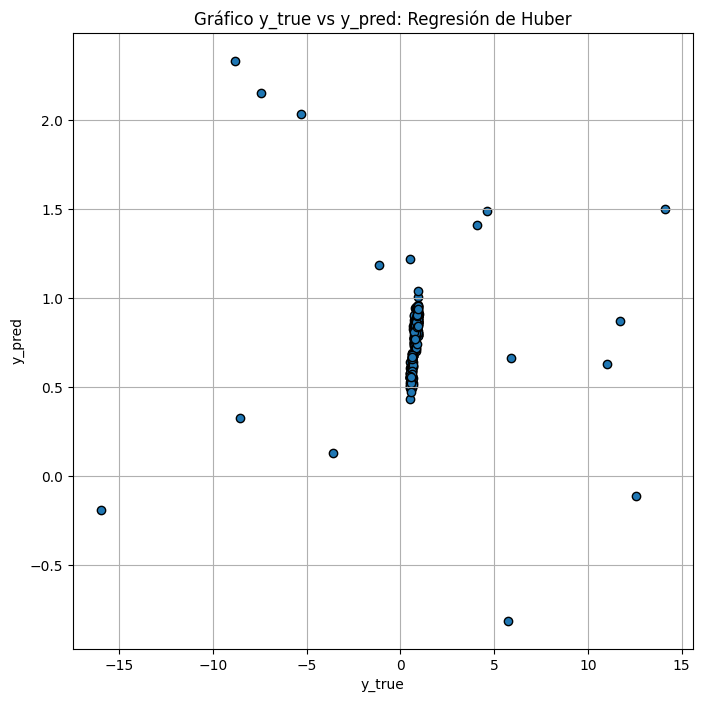

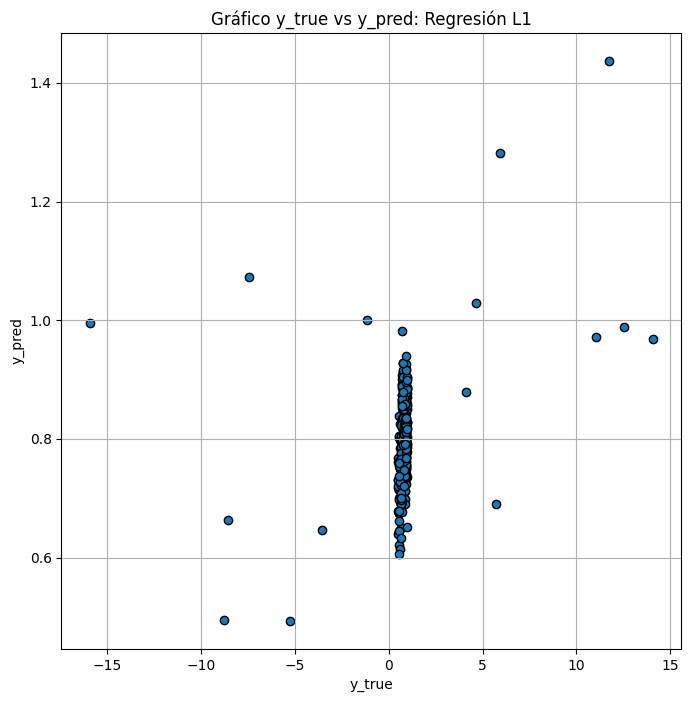

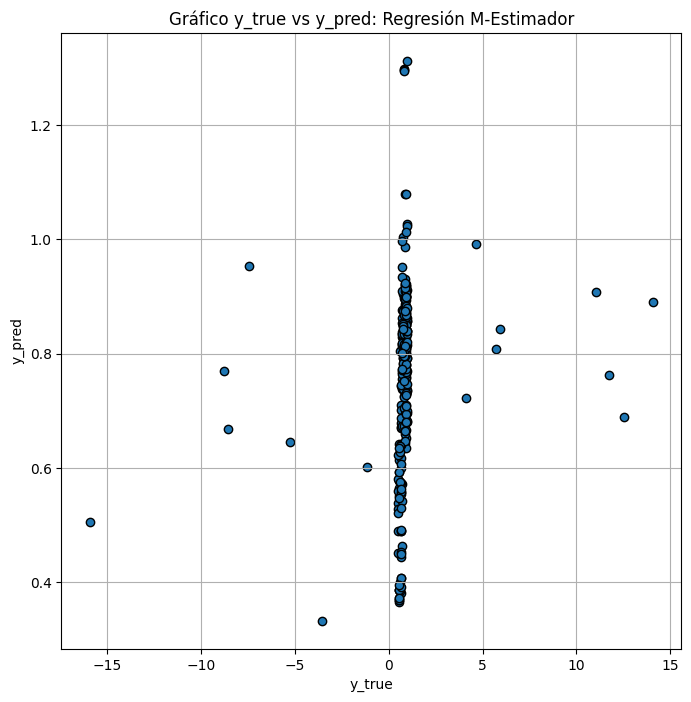

In [50]:
plot_y_true_vs_y_pred(y_test, y_pred_rl, title="Gráfico y_true vs y_pred: Regresión lineal", xlabel="y_true", ylabel="y_pred")
plot_y_true_vs_y_pred(y_test, y_pred_ransac, title="Gráfico y_true vs y_pred: Regresión Ransac", xlabel="y_true", ylabel="y_pred")
plot_y_true_vs_y_pred(y_test, y_pred_huber, title="Gráfico y_true vs y_pred: Regresión de Huber", xlabel="y_true", ylabel="y_pred")
plot_y_true_vs_y_pred(y_test, y_pred_rmm, title="Gráfico y_true vs y_pred: Regresión L1", xlabel="y_true", ylabel="y_pred")
plot_y_true_vs_y_pred(y_test, y_pred_rme, title="Gráfico y_true vs y_pred: Regresión M-Estimador", xlabel="y_true", ylabel="y_pred")

### Distribuciones de errores

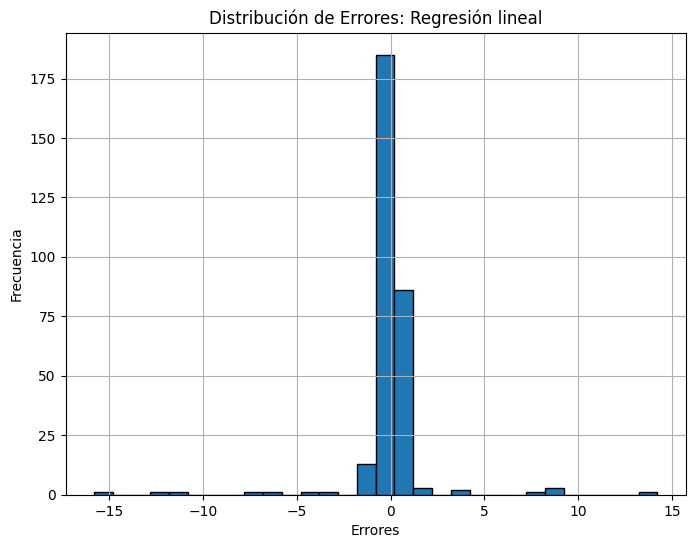

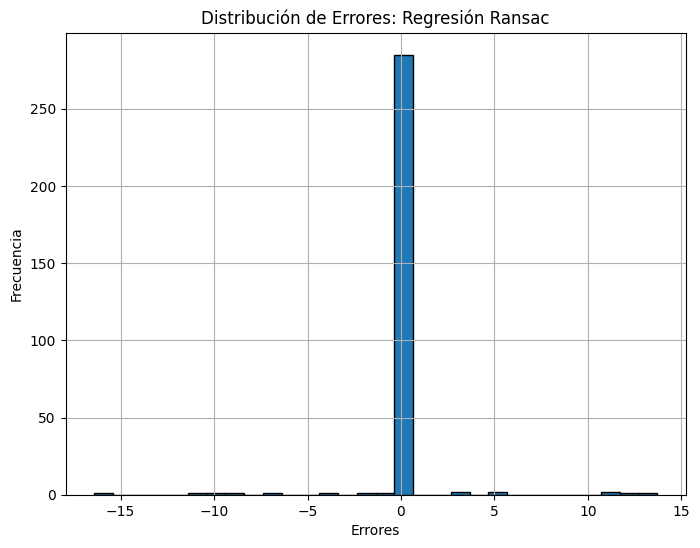

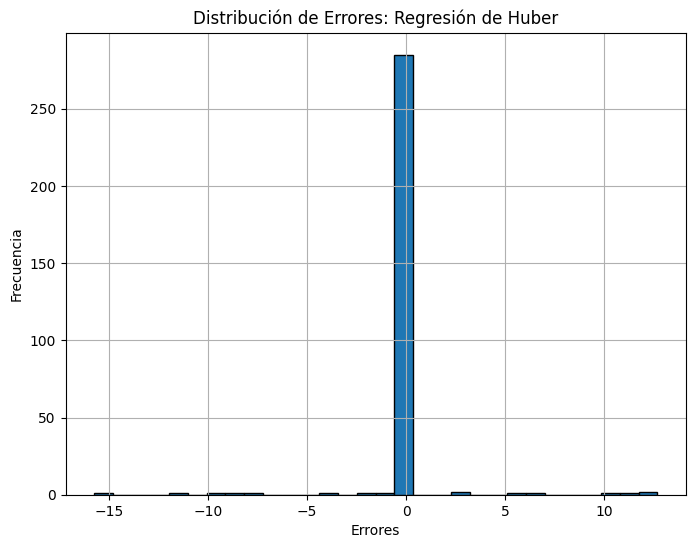

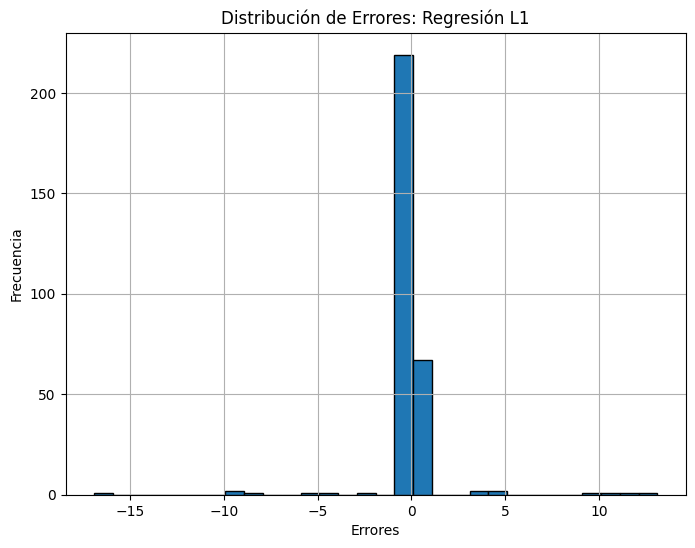

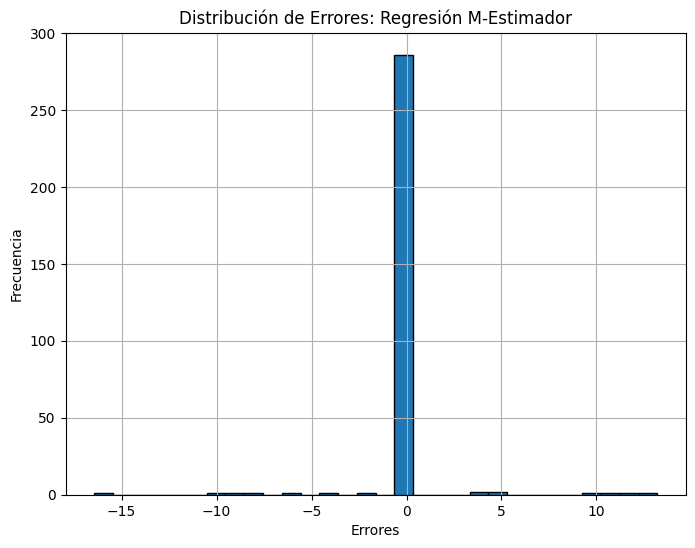

In [51]:
plot_error_distribution(y_test, y_pred_rl, title="Distribución de Errores: Regresión lineal", xlabel="Errores", ylabel="Frecuencia")
plot_error_distribution(y_test, y_pred_ransac, title="Distribución de Errores: Regresión Ransac", xlabel="Errores", ylabel="Frecuencia")
plot_error_distribution(y_test, y_pred_huber, title="Distribución de Errores: Regresión de Huber", xlabel="Errores", ylabel="Frecuencia")
plot_error_distribution(y_test, y_pred_rmm, title="Distribución de Errores: Regresión L1", xlabel="Errores", ylabel="Frecuencia")
plot_error_distribution(y_test, y_pred_rme, title="Distribución de Errores: Regresión M-Estimador", xlabel="Errores", ylabel="Frecuencia")

### Intervalos de confianza del Error

In [52]:
int_conf_rl = int_conf_no_par(y_test, y_pred_rl)
print("Intervalo de confianza para la Regresión lineal: ", int_conf_rl)

int_conf_ransac = int_conf_no_par(y_test, y_pred_ransac)
print("Intervalo de confianza para la Regresión RANSAC: ", int_conf_ransac)

int_conf_huber = int_conf_no_par(y_test, y_pred_huber)
print("Intervalo de confianza para la Regresión Huber: ", int_conf_huber)

int_conf_rmm = int_conf_no_par(y_test, y_pred_rmm)
print("Intervalo de confianza para la Regresión L1: ", int_conf_rmm)

int_conf_rme = int_conf_no_par(y_test, y_pred_rme)
print("Intervalo de confianza para la Regresión M-Estimador: ", int_conf_rme)

Intervalo de confianza para la Regresión lineal:  (0.5821574464789689, 0.8215007155612059)
Intervalo de confianza para la Regresión RANSAC:  (0.32575610490300644, 0.5724275680804278)
Intervalo de confianza para la Regresión Huber:  (0.31102589324535257, 0.5626428368922137)
Intervalo de confianza para la Regresión L1:  (0.3533464673118411, 0.5863530274557072)
Intervalo de confianza para la Regresión M-Estimador:  (0.3498649619600747, 0.5912498778320237)
